<a href="https://colab.research.google.com/github/Cynthiaudoye/Data-Science-Jobs-and-Salaries-Analysis-Skills/blob/main/Cynthia_Oeson_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Reading my data in the dataframe
data = pd.read_csv("/content/Project 2 Oeson.csv")

data
#data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
# getting the statistical view of my numerical dataset
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [4]:
# Checking on all my columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
# Checking for null values
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Checking the unique values of the dataframe
data.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9350    False
9351    False
9352    False
9353    False
9354    False
Length: 9355, dtype: bool

In [8]:
data.company_location.unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [9]:
data.job_title.unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [10]:
data.job_category.unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [11]:
data.experience_level.unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [12]:
data.employment_type.unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [13]:
data.work_setting.unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [14]:
# Analyzing the job post by year
count_year = data.work_year.value_counts().sort_values(ascending=True)
count_year

2020      71
2021     197
2022    1634
2023    7453
Name: work_year, dtype: int64

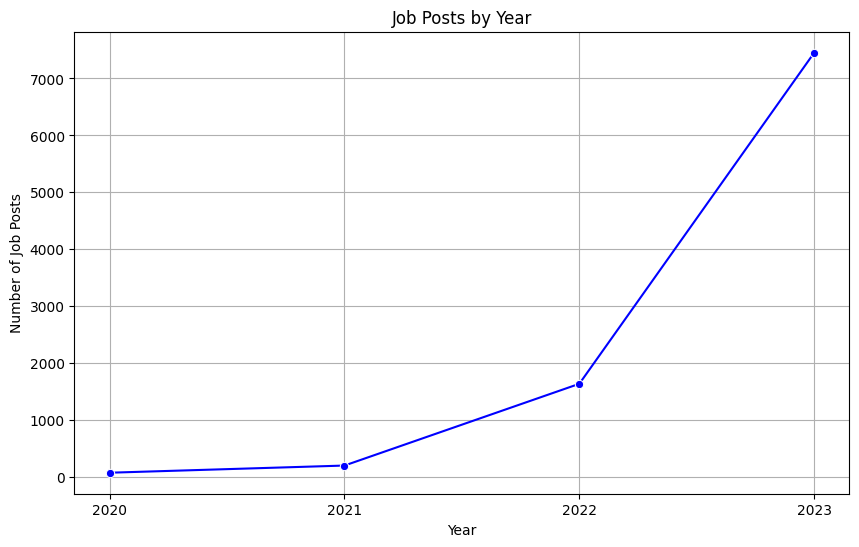

In [15]:
# Visualisation of the jobs by year

count_year_df = count_year.reset_index()
count_year_df.columns = ['Year', 'Count']
plt.figure(figsize=(10,6))
sns.lineplot(x ='Year', y = 'Count', data = count_year_df, marker='o', linestyle='-', color='b')
plt.title('Job Posts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Job Posts')

# Ensureing x-ticks are integer years
plt.xticks(count_year_df['Year'], [str(int(year)) for year in count_year_df['Year']])

plt.grid(True)  #Added a grid for easier reading
plt.show()

**Insights:**The plot shows how job postings for all data-related fields have increased each year in our dataset. This upward trend suggests more jobs are becoming available in areas related to data. The jump in job postings from 2022 to 2023 is especially clear, pointing to a significant growth in demand for data-related roles during this time. This trend indicates that jobs in data fields are becoming more important and numerous.

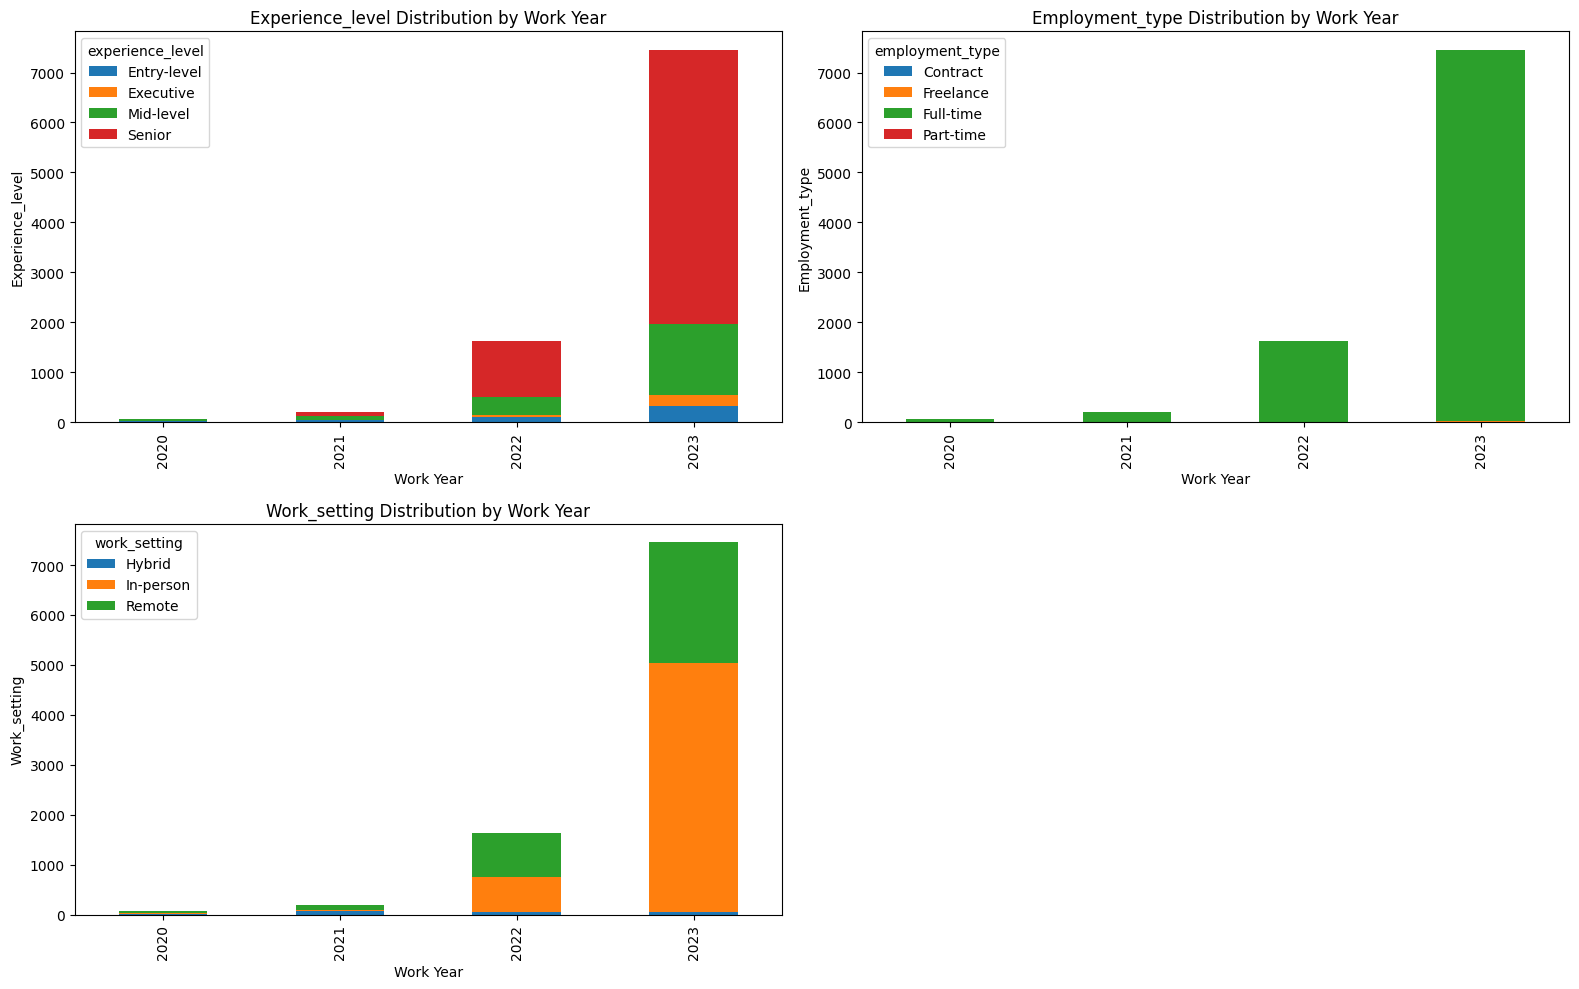

In [16]:
# defining the categorical columns
cat_cols = ['experience_level', 'employment_type', 'work_setting']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(16, 10))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through the categorical columns and create a bar plot for each
for i, col in enumerate(cat_cols):
  # Calculate the count per group for the current column
  df6 = data.groupby(['work_year',col]).size().unstack()

  # Using seaborn barplot and specify the axis for the plot
  df6.plot(kind='bar', stacked=True, ax=axes[i], title=f'Counts by Work Year and {cat_cols}')

  # setting the x and y labels
  axes[i].set_xlabel('Work Year')
  axes[i].set_ylabel(col.capitalize())

  # setting the title for each subplot
  axes[i].set_title(f"{col.capitalize()} Distribution by Work Year")

# adjusting layout for better spacing between plots
plt.tight_layout()

# Delete any unused axes if the number of categorical columns is less than the subplot grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


**Insight:**Our dataset reveals in subsequent work years that in the key job market trends: a strong preference for in-person work, dominance of full-time roles, and a high demand for senior and mid-level positions. In-person roles significantly outweigh remote opportunities, indicating a continued value for traditional office settings. Senior-level roles are most sought after, with fewer executive postings, suggesting a competitive market for experienced professionals. Full-time positions are consistently favored, underscoring a desire for long-term employment commitments. Overall, the data highlights a job market leaning towards established work arrangements and valuing experience.

<ipython-input-17-da8c5bdb848e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_per_group, x=col, y='salary_in_usd', palette=palette, ax=axes[i])
<ipython-input-17-da8c5bdb848e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_per_group, x=col, y='salary_in_usd', palette=palette, ax=axes[i])
<ipython-input-17-da8c5bdb848e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_per_group, x=col, y='salary_in_usd', palette=palette, ax=axes[i])


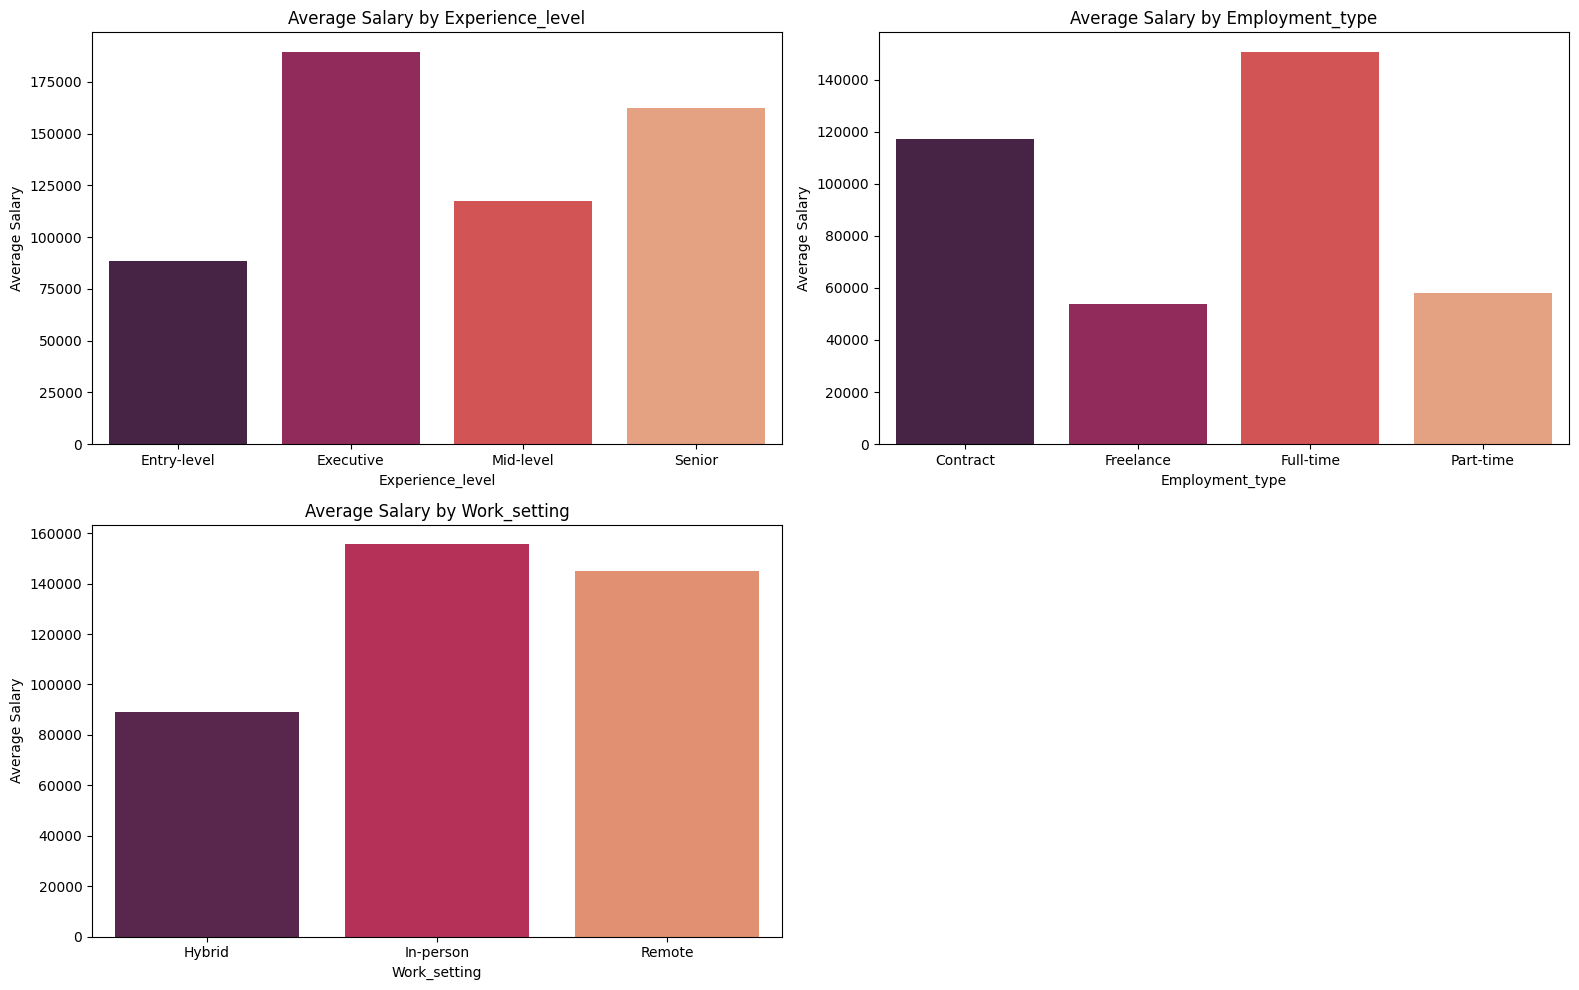

In [17]:
# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and create a bar plot for each
for i, col in enumerate(cat_cols):
    # Calculate the average salary per group for the current column
    avg_salary_per_group = data.groupby(col)['salary_in_usd'].mean().reset_index()

    # Generate a color palette with the same number of colors as bars
    palette = sns.color_palette("rocket", n_colors=len(avg_salary_per_group))

    # Using seaborn barplot and specify the axis for the plot with a palette
    sns.barplot(data=avg_salary_per_group, x=col, y='salary_in_usd', palette=palette, ax=axes[i])

    # Setting the x and y labels
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Salary')

    # Setting the title for each subplot
    axes[i].set_title(f"Average Salary by {col.capitalize()}")

# Adjusting layout for better spacing between plots
plt.tight_layout()

# Delete any unused axes if the number of categorical columns is less than the subplot grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



plt.show()


**Insights:**Our analysis reveals distinct salary trends across work settings, employment types, and experience levels. In-person roles command the highest average salaries, followed by remote and then hybrid positions, suggesting a premium on traditional office settings. For employment types, full-time jobs offer the highest pay, with contract roles next, and part-time and freelancing closely aligned, indicating a competitive landscape for various work arrangements. At the experience spectrum's peak, executives top the salary charts, with senior, mid-level, and entry-level positions following in descending order. This highlights the clear link between experience and compensation, underscoring the value of expertise and the traditional preference for full-time, in-office roles in the job market.

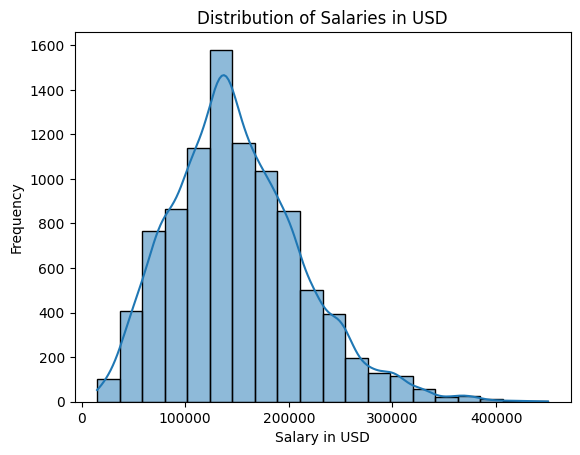

In [18]:
# Using seaborn for histogram visualization
sns.histplot(data.salary_in_usd, kde=True, bins=20)

# Set the title and labels for the plot
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Insights:**The histogram distribution indicates that the majority of job postings feature salaries ranging from **$50,000 to $260,000,** exhibiting a right-skewed pattern. This skewness suggests that while most salaries are concentrated within this range, a significant number of positions offer higher salaries, extending beyond the $260,000 mark, albeit less frequently. The distribution's shape highlights the presence of outlier roles with exceptional salary offerings, potentially in niche or highly specialized fields. Additionally, the concentration of postings around the lower end of the range reflects the broader availability of entry and mid-level positions as compared to the scarcer high-paying opportunities. This pattern underscores the competitive nature of the job market, where higher salaries are associated with roles demanding specific expertise or experience levels.

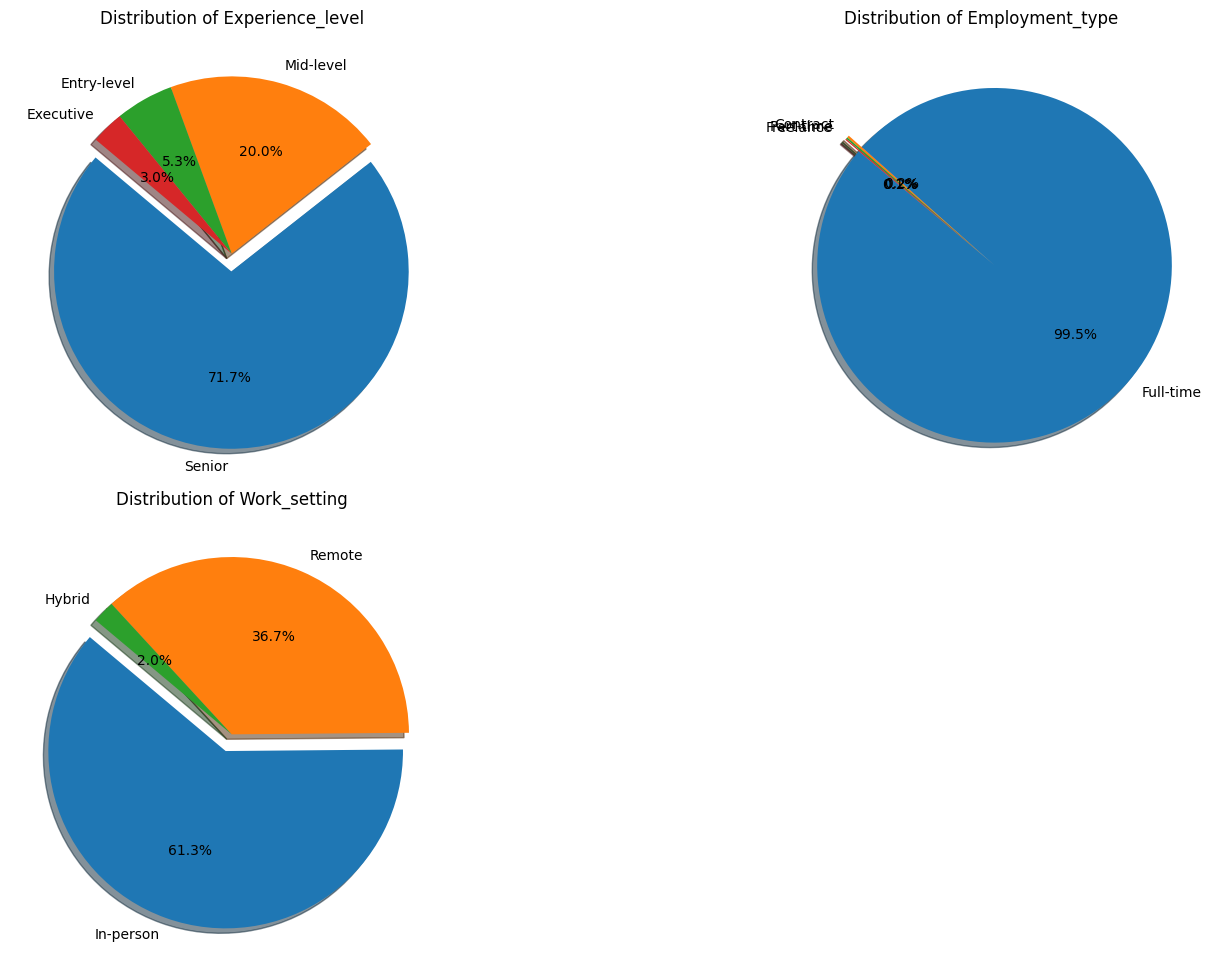

In [19]:
# defining the categorical columns
cat_cols = ['experience_level', 'employment_type', 'work_setting']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and create a pie chart for each
for i, col in enumerate(cat_cols):
    # Calculate the count per group for the current column
    count_per_group = data[col].value_counts()

    # Generate an 'explode' list to emphasize the largest slice
    # Here, we're exploding the largest slice by setting its explode value to 0.1
    explode = [0.1 if j == count_per_group.idxmax() else 0 for j in count_per_group.index]

    # Plotting the pie chart for the current column
    axes[i].pie(count_per_group, labels=count_per_group.index, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)

    # Set the title for each subplot
    axes[i].set_title(f"Distribution of {col.capitalize()}")

# Adjust layout for better spacing between plots
plt.tight_layout()

# Delete any unused axes if the number of categorical columns is less than the subplot grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


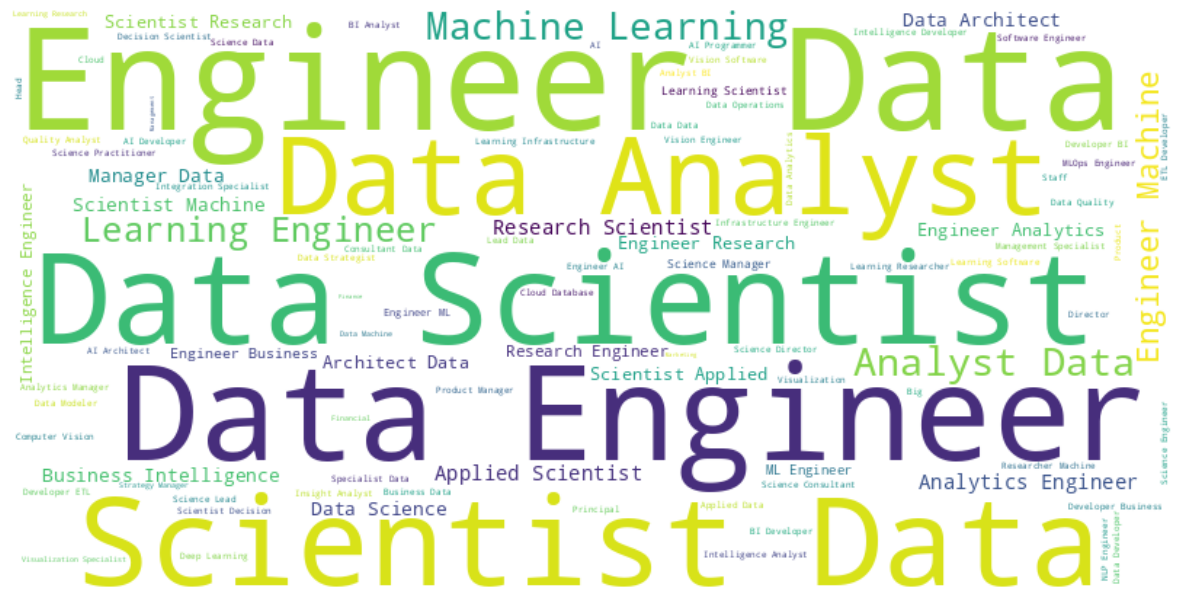

In [20]:
# Concatenating all job titles into a single string
text = ' '.join(job for job in data['job_title'])
stopwords = STOPWORDS

# Creating a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Displaying the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers and ticks
plt.show()

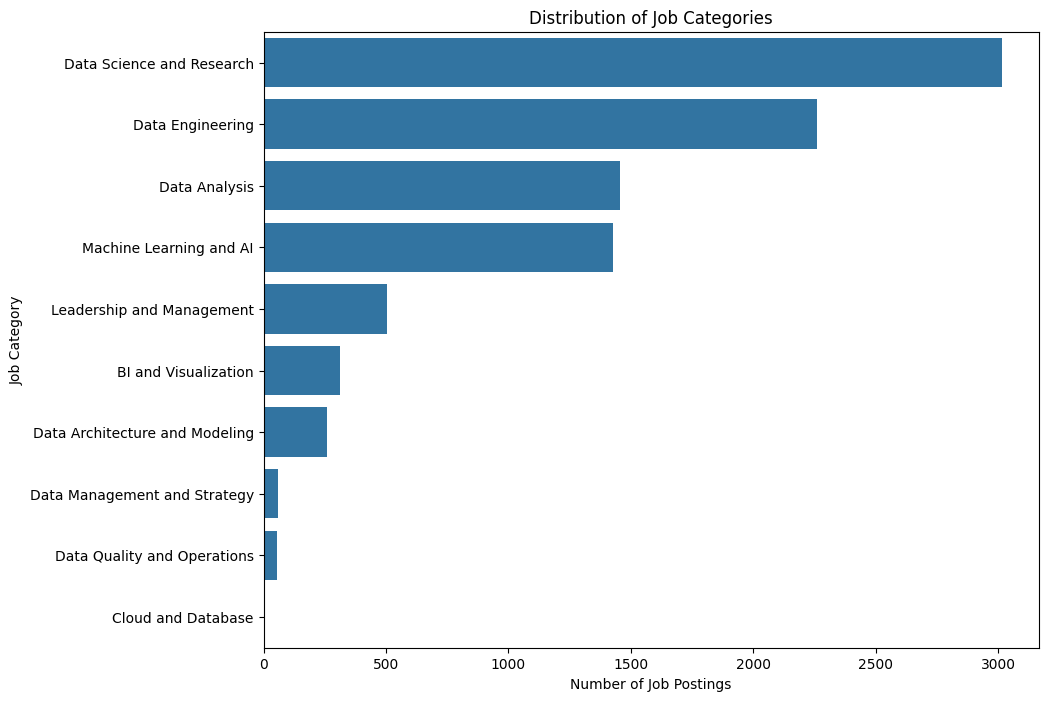

In [21]:
# Count plot for job categories to show their distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='job_category', data=data, order = data['job_category'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Category')
plt.show()

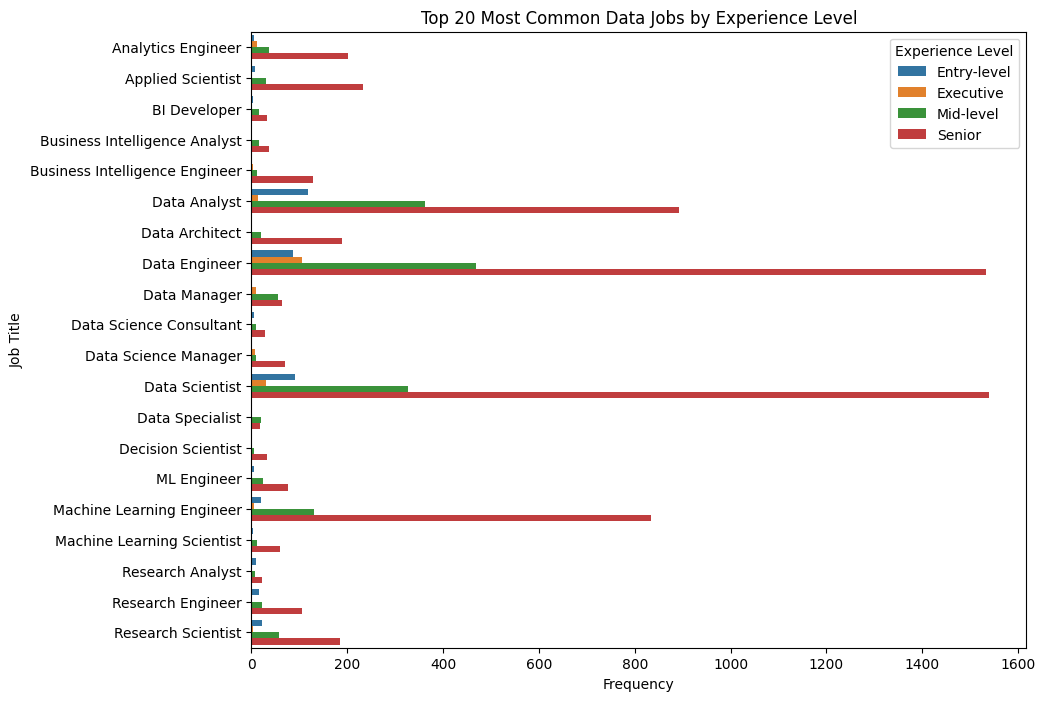

In [22]:
# getting the top 20 most common job titles
top_20_titles = data['job_title'].value_counts().head(20).index

# Filter the original DataFrame to include only rows with the top 20 job titles
filtered_data = data[data['job_title'].isin(top_20_titles)]

# grouping the filtered data by job title and experience level, and then counting the occurrences
job_title_experience = filtered_data.groupby(['job_title', 'experience_level']).size().reset_index(name='frequency')

# Pivoting the data for plotting. This will create a DataFrame where each job title is a row,
# each experience level is a column, and values are frequencies.
pivot_data = job_title_experience.pivot(index='job_title', columns='experience_level', values='frequency').fillna(0)

# Because sns.barplot doesn't directly support plotting from a pivoted DataFrame like this,
# we melt the DataFrame back to a long-form DataFrame suitable for sns.barplot
melted_data = pivot_data.reset_index().melt(id_vars='job_title', var_name='experience_level', value_name='frequency')

# plotting now using seaborn barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=melted_data, y='job_title', x='frequency', hue='experience_level', dodge=True)
plt.title('Top 20 Most Common Data Jobs by Experience Level')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.legend(title='Experience Level')
plt.show()


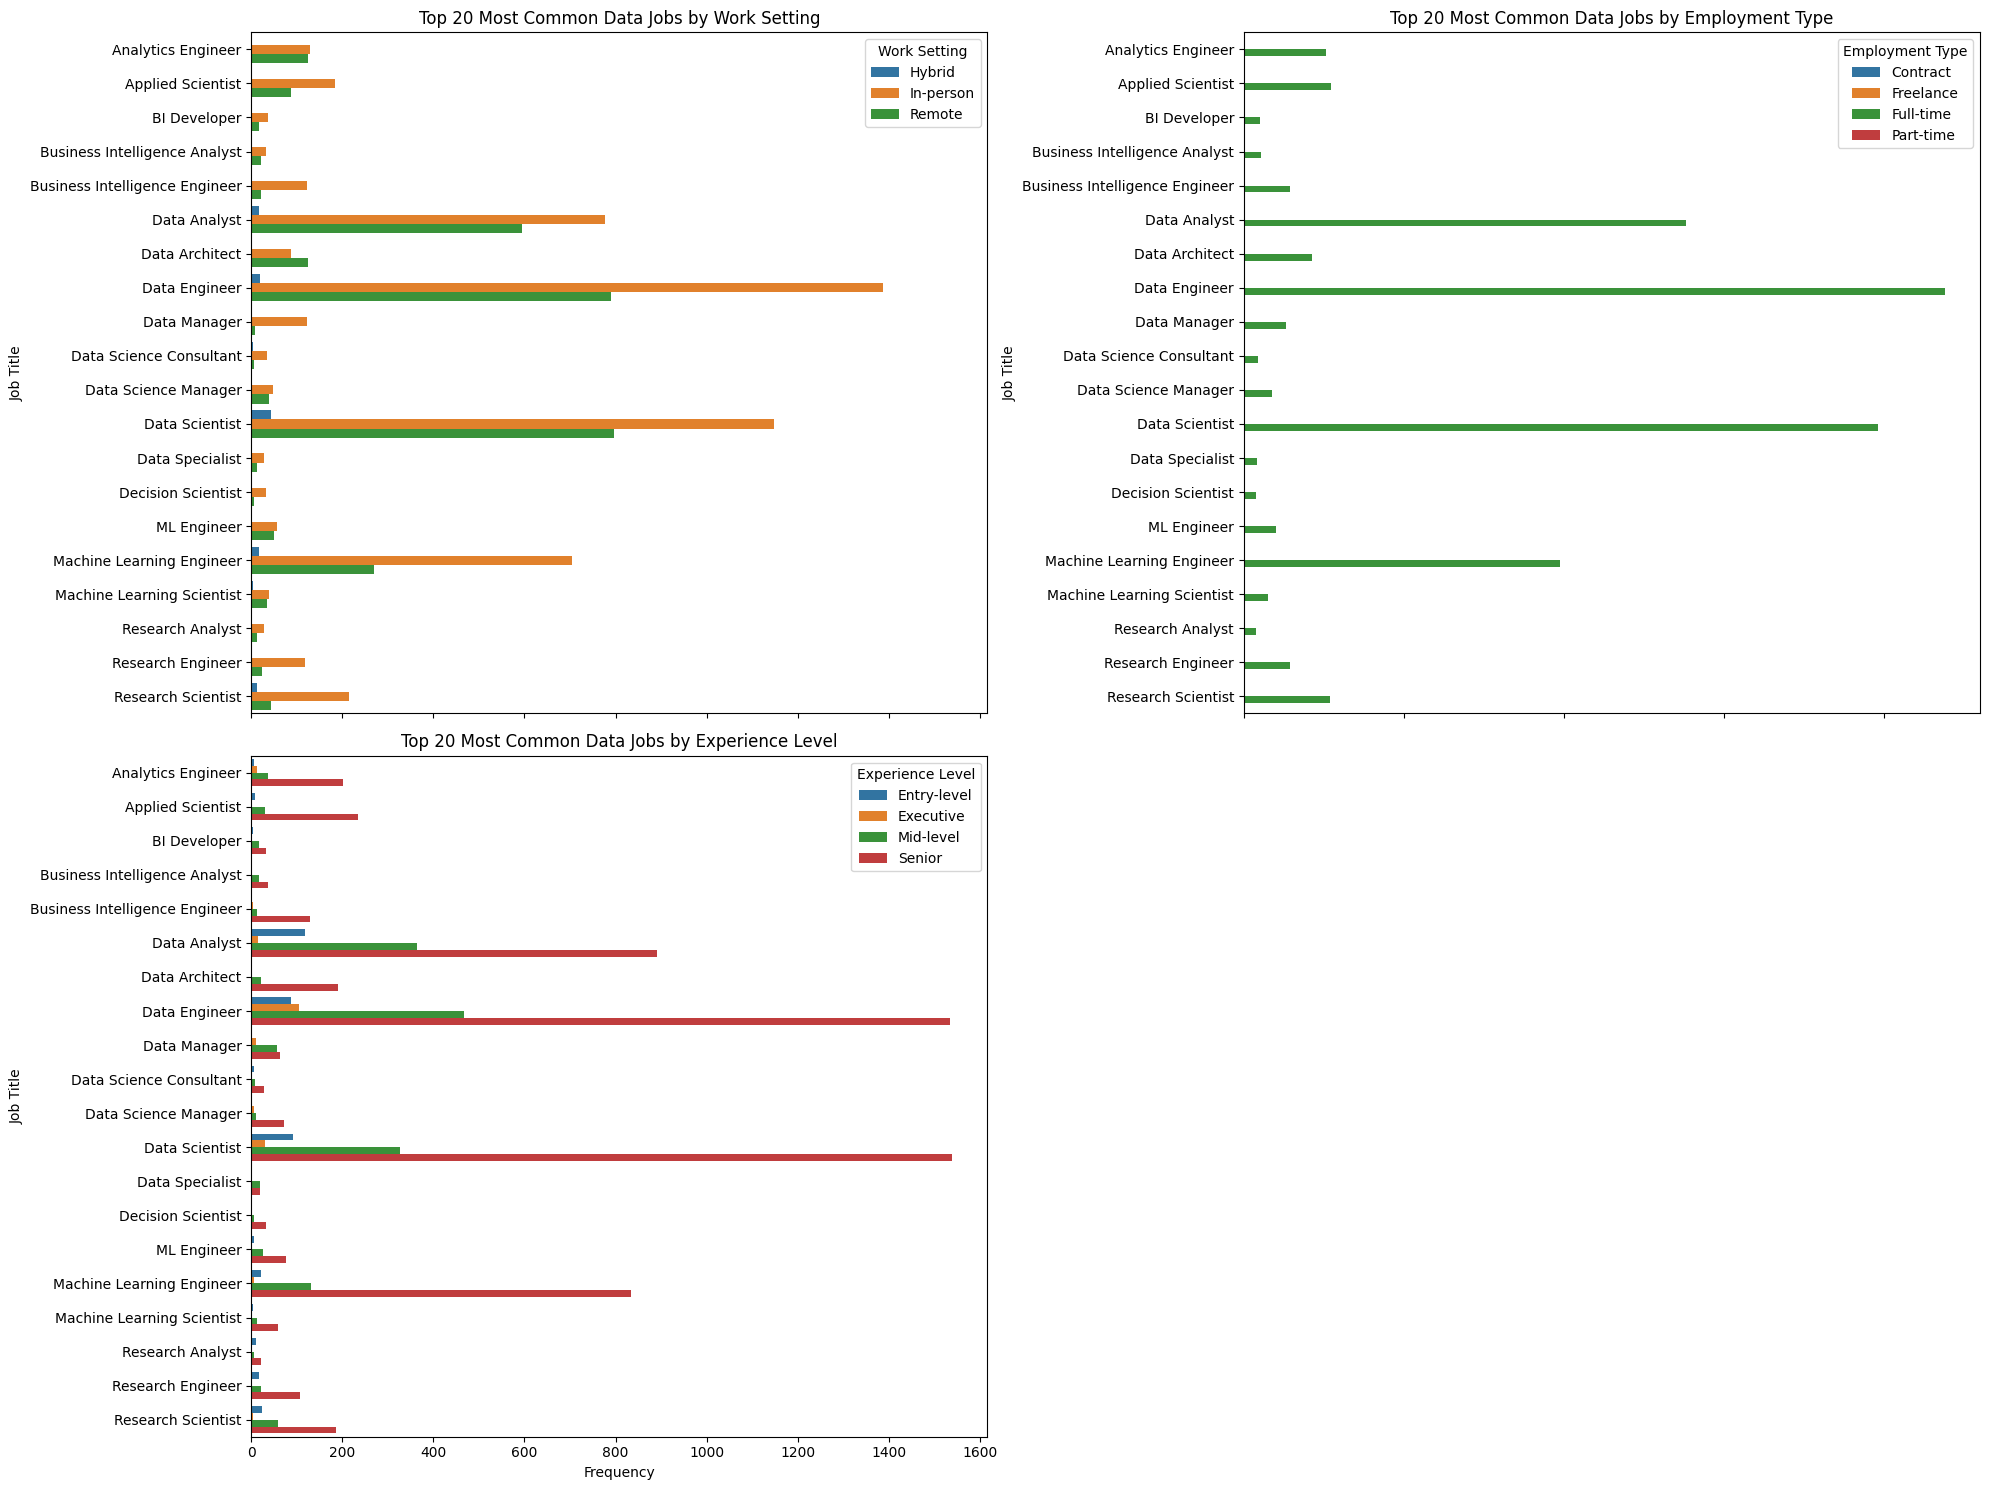

In [23]:
# Getting the top 20 most common job titles
top_20_titles = data['job_title'].value_counts().head(20).index

# Filtering the original DataFrame to include only rows with the top 20 job titles
filtered_data = data[data['job_title'].isin(top_20_titles)]

# Creating a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex='col')  # Adjusted for a shared x-axis within columns if necessary

# Flatten the axes for easier iteration
axes_flat = axes.flatten()


# Visualization for work_setting
work_setting_data = filtered_data.groupby(['job_title', 'work_setting']).size().reset_index(name='frequency')
melted_work_setting = work_setting_data.pivot(index='job_title', columns='work_setting', values='frequency').fillna(0).reset_index().melt(id_vars='job_title', var_name='work_setting', value_name='frequency')
sns.barplot(data=melted_work_setting, y='job_title', x='frequency', hue='work_setting', dodge=True, ax=axes_flat[0])
axes_flat[0].set_title('Top 20 Most Common Data Jobs by Work Setting')
axes_flat[0].set_xlabel('Frequency')
axes_flat[0].set_ylabel('Job Title')
axes_flat[0].legend(title='Work Setting')

# Visualization for employment_type
employment_type_data = filtered_data.groupby(['job_title', 'employment_type']).size().reset_index(name='frequency')
melted_employment_type = employment_type_data.pivot(index='job_title', columns='employment_type', values='frequency').fillna(0).reset_index().melt(id_vars='job_title', var_name='employment_type', value_name='frequency')
sns.barplot(data=melted_employment_type, y='job_title', x='frequency', hue='employment_type', dodge=True, ax=axes_flat[1])
axes_flat[1].set_title('Top 20 Most Common Data Jobs by Employment Type')
axes_flat[1].set_xlabel('Frequency')
axes_flat[1].set_ylabel('Job Title')
axes_flat[1].legend(title='Employment Type')

# Additional Visualization for experience_level
experience_level_data = filtered_data.groupby(['job_title', 'experience_level']).size().reset_index(name='frequency')
melted_experience_level = experience_level_data.pivot(index='job_title', columns='experience_level', values='frequency').fillna(0).reset_index().melt(id_vars='job_title', var_name='experience_level', value_name='frequency')
sns.barplot(data=melted_experience_level, y='job_title', x='frequency', hue='experience_level', dodge=True, ax=axes_flat[2])
axes_flat[2].set_title('Top 20 Most Common Data Jobs by Experience Level')
axes_flat[2].set_xlabel('Frequency')
axes_flat[2].set_ylabel('Job Title')
axes_flat[2].legend(title='Experience Level')

# deleting unused subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


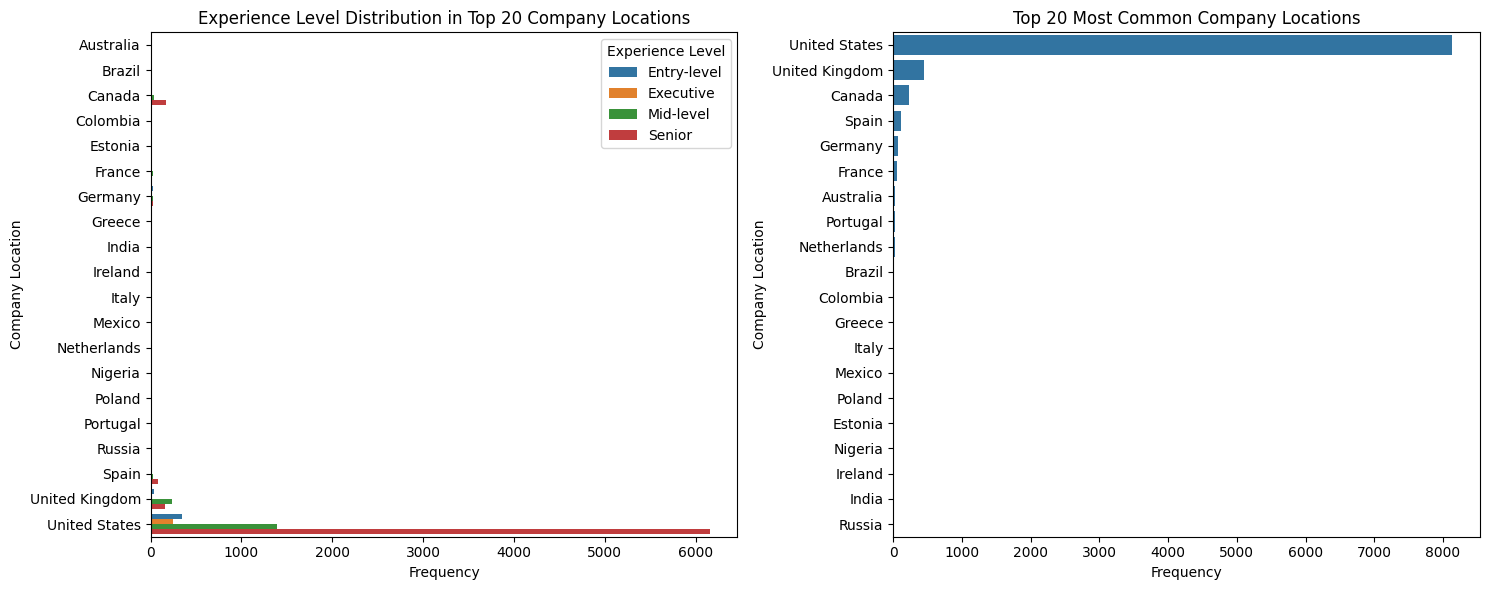

In [24]:
# Creating a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First Visualization: Experience Level Distribution in Top 20 Company Locations
# -------------------------------------------------------------------------------

# Getting the top 20 most common company locations
top_20_locations = data['company_location'].value_counts().head(20).index

# Filtered the DataFrame to include only rows with the top 20 company locations
filtered_data = data[data['company_location'].isin(top_20_locations)]

# Grouped the filtered data by company location and experience level, then count the occurrences
location_experience = filtered_data.groupby(['company_location', 'experience_level']).size().reset_index(name='frequency')

# Pivoted the data for plotting
pivot_data = location_experience.pivot(index='company_location', columns='experience_level', values='frequency').fillna(0)

# Melted the DataFrame back to a long-form DataFrame suitable for sns.barplot
melted_data = pivot_data.reset_index().melt(id_vars='company_location', var_name='experience_level', value_name='frequency')

# Ploting using seaborn barplot on the first subplot
sns.barplot(data=melted_data, y='company_location', x='frequency', hue='experience_level', dodge=True, ax=axes[0])
axes[0].set_title('Experience Level Distribution in Top 20 Company Locations')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Company Location')
axes[0].legend(title='Experience Level')

# Second Visualization: Top 20 Most Common Company Locations by Frequency
# ------------------------------------------------------------------------

# Getting the top 20 company locations by frequency
company_locations = data['company_location'].value_counts().head(20)

# Plotting the frequencies of the top 20 company locations on the second subplot
sns.barplot(y=company_locations.index, x=company_locations.values, ax=axes[1])
# Set the title and labels for the second subplot
axes[1].set_title('Top 20 Most Common Company Locations')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Company Location')

plt.tight_layout()
plt.show()


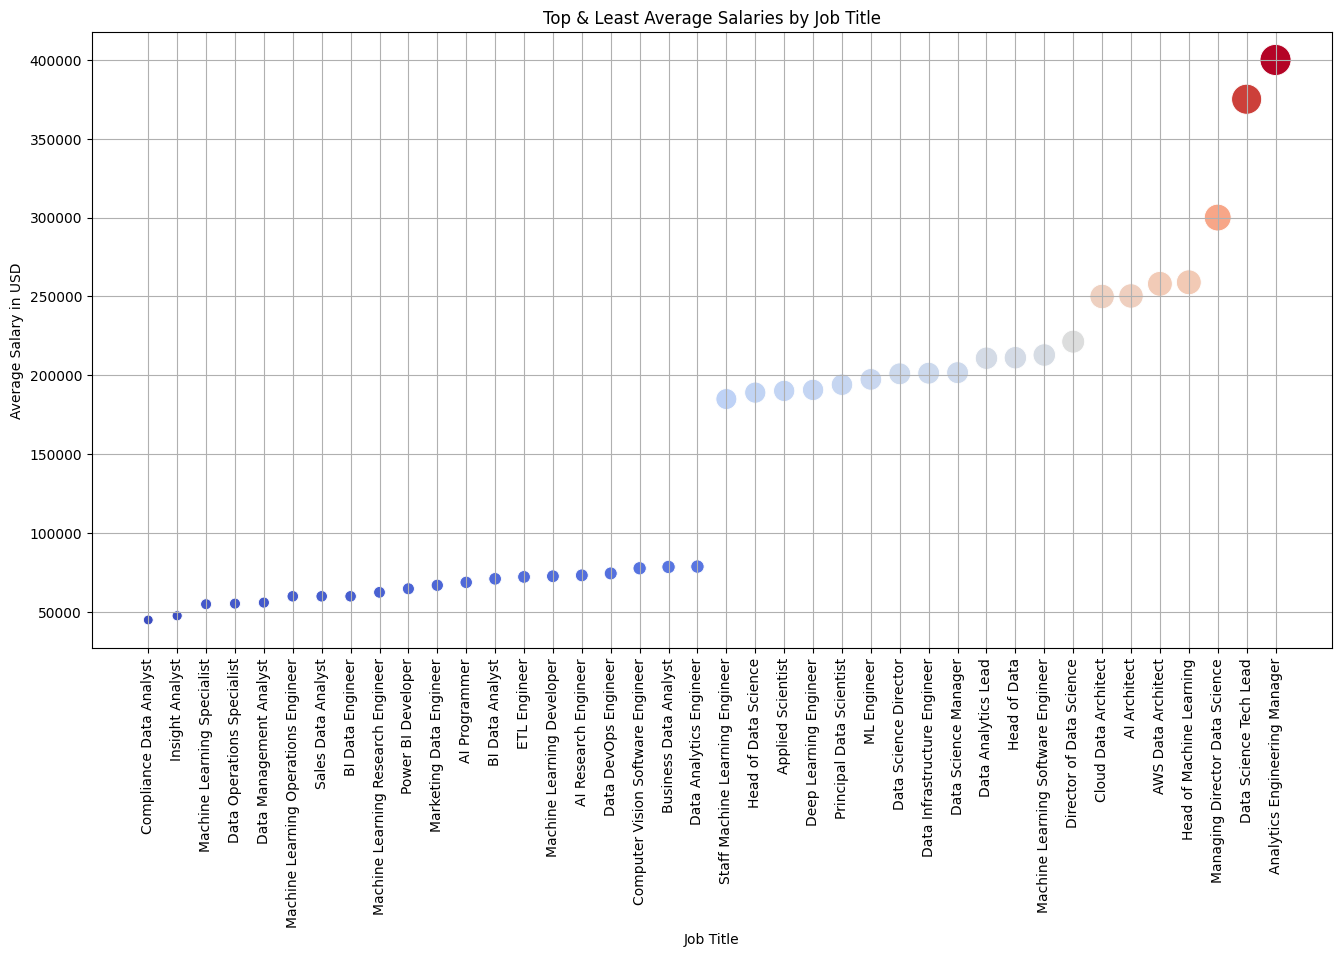

In [25]:
# Average salary in USD by Job Title
average_salary_by_job_title = data.groupby('job_title')['salary_in_usd'].mean().sort_values().reset_index()


top_job_titles = average_salary_by_job_title.tail(20)  # Top 20 highest average salaries
bottom_job_titles = average_salary_by_job_title.head(20)  # Bottom 20 least average salaries

# Merging the top and bottom for visualization
visual_data = pd.concat([bottom_job_titles, top_job_titles])

# Plotting
plt.figure(figsize=(16, 8))
scatter = sns.scatterplot(data=visual_data, x='job_title', y='salary_in_usd', size='salary_in_usd', hue='salary_in_usd', palette="coolwarm", legend=False, sizes=(50, 500))
plt.xticks(rotation=90)
plt.title('Top & Least Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()

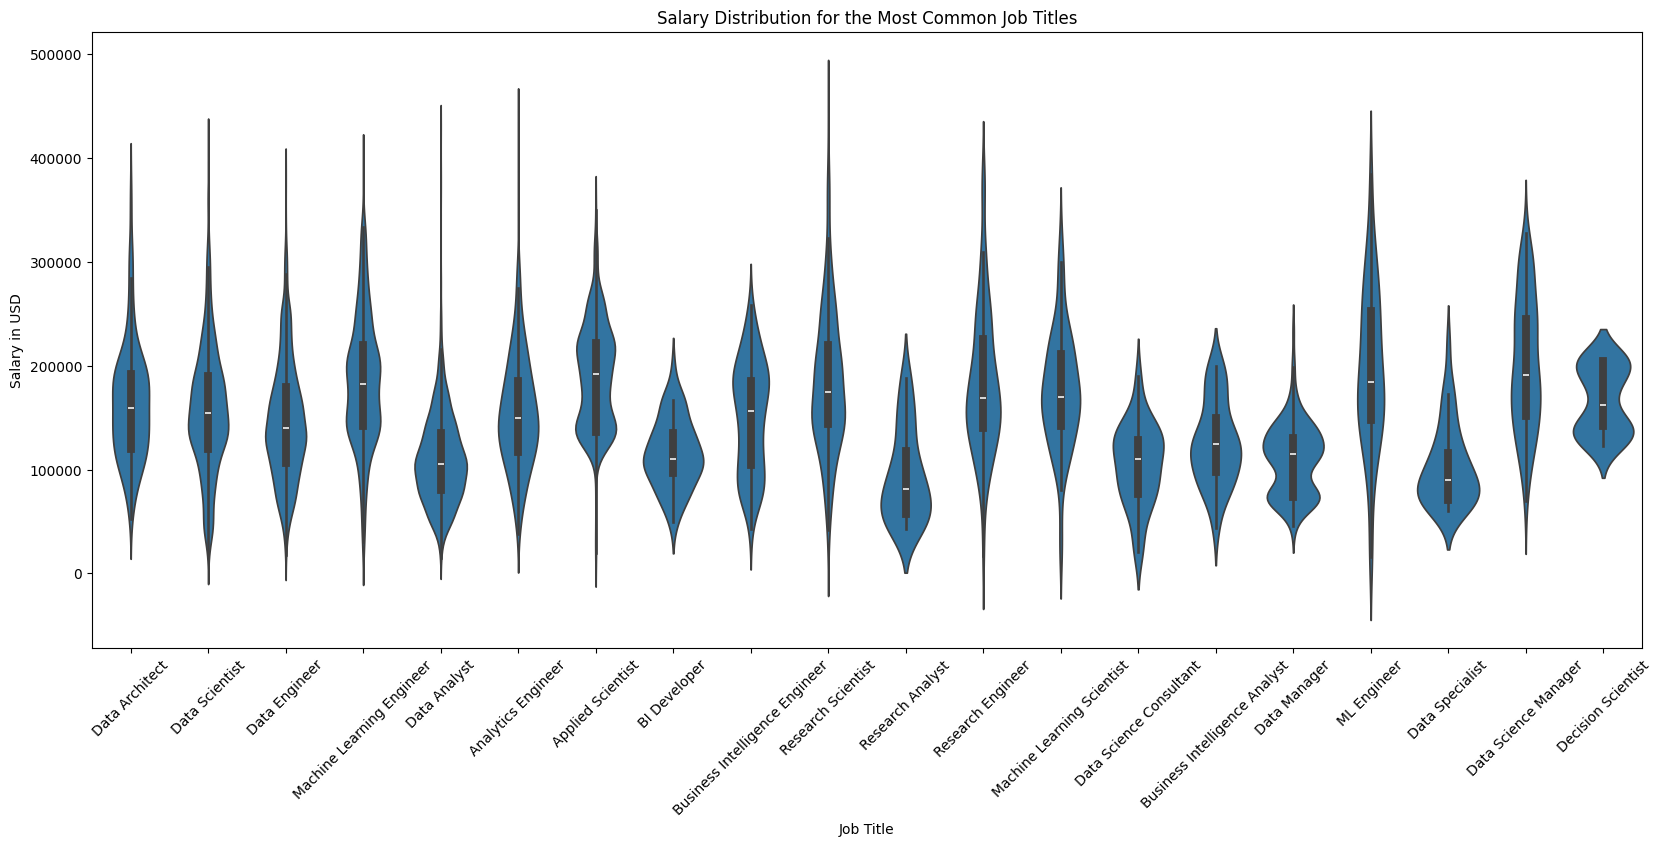

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64


In [29]:
job_title_frequency = data['job_title'].value_counts()

# Isolating the top 10 most common data jobs
top_10_job_titles = job_title_frequency.head(20)

# Assuming `top_10_job_titles` holds the names of the top 10 job titles
top_10_titles_list = top_10_job_titles.index.tolist()

# Filtering the dataset for only the top 10 job titles
top_10_jobs_data = data[data['job_title'].isin(top_10_titles_list)]

# Plotting the violin plot for average salaries of the most common job titles
plt.figure(figsize=(20, 8))
sns.violinplot(x='job_title', y='salary_in_usd', data=top_10_jobs_data)
plt.xticks(rotation=45)
plt.title('Salary Distribution for the Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.show()
print(job_title_frequency)

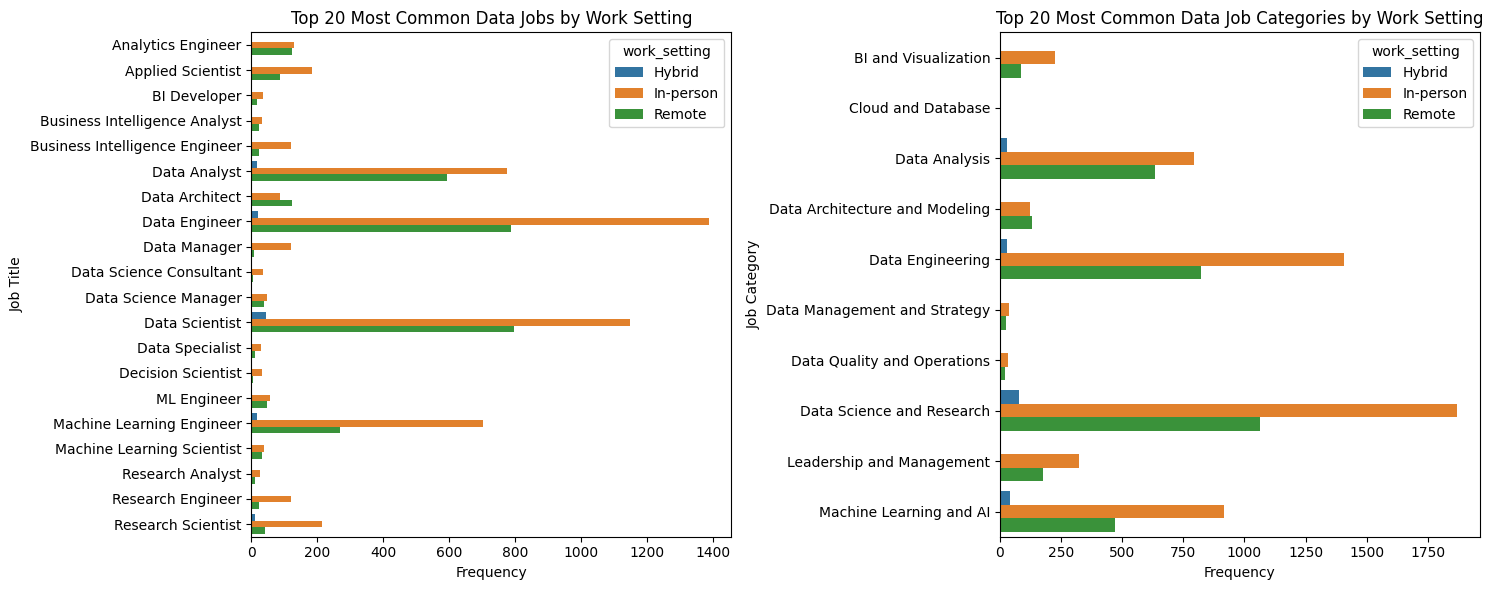

In [27]:
# Count of jobs
count_job_title = data['job_title'].value_counts()
count_job_category = data['job_category'].value_counts()

# Isolating the top 20 most common data jobs and categories
top_20_job_titles = count_job_title.head(20).index.tolist()
top_20_job_category = count_job_category.index.tolist()

filtered_data1 = data[data['job_title'].isin(top_20_job_titles)]
filtered_data2 = data[data['job_category'].isin(top_20_job_category)]

# Now, grouping the filtered data by job title, category and work setting, then count the occurrences
job_title_experience1 = filtered_data1.groupby(['job_title', 'work_setting']).size().reset_index(name='frequency')
job_title_experience2 = filtered_data2.groupby(['job_category', 'work_setting']).size().reset_index(name='frequency')

# Pivoting the data for plotting
pivot_data1 = job_title_experience1.pivot(index='job_title', columns='work_setting', values='frequency').fillna(0)
pivot_data2 = job_title_experience2.pivot(index='job_category', columns='work_setting', values='frequency').fillna(0)

# Melting the DataFrame back to a long-form
melted_data1 = pivot_data1.reset_index().melt(id_vars='job_title', var_name='work_setting', value_name='frequency')
melted_data2 = pivot_data2.reset_index().melt(id_vars='job_category', var_name='work_setting', value_name='frequency')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting for job titles
sns.barplot(data=melted_data1, y='job_title', x='frequency', hue='work_setting', dodge=True, ax=axes[0])
axes[0].set_title('Top 20 Most Common Data Jobs by Work Setting')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Job Title')

# Plotting for job categories
sns.barplot(data=melted_data2, y='job_category', x='frequency', hue='work_setting', dodge=True, ax=axes[1])
axes[1].set_title('Top 20 Most Common Data Job Categories by Work Setting')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Job Category')

plt.tight_layout()
plt.show()


**Summary Insights:**The job market data shows that most jobs in data fields have clear trends. Salaries are competitive, especially for jobs where you need to go to an office or can work from home. Most of these jobs are in the UK and US, with some in Canada too. This tells us that the UK and US are big places for data jobs, offering lots of opportunities for people in these fields. In short, if you're looking into data jobs, knowing about these trends in experience, job types, work places, pay, and where jobs are can really help you see where the chances are best.